## <font color='darkblue'>Preface</font>
([article source](https://towardsdatascience.com/outlier-or-inlier-types-of-algorithms-to-detect-anomalous-behavior-f812afa07f1b)) <font size='3ptx'>**A Comprehensive Guide for Anomaly Detection Algorithms with Their Explanations and Formulations**</font>

Anomaly detection is a critical problem that has been researched within diverse research areas and application disciplines. **This article aims to construct a structured and comprehensive overview of the selected algorithms for anomaly detection by targeting data scientists, data analysts, and machine learning specialists as an audience.**

### <font color='darkgreen'>Overview</font>
* <font size='3ptx'>[**Concept of Anomaly Detection**](#sect1)</font>
* <font size='3ptx'>[**Types of Anomalies**](#sect2)</font>
* <font size='3ptx'>[**Table of Contents**](#sect3)</font>

<a id='sect1'></a>
## <font color='darkblue'>Concept of Anomaly Detection</font>
**An unexpected change that performs highly divergent attitudes from other observations in a time period can be represented as abnormal behavior**. In other words, [**Anomaly Detection**](https://en.wikipedia.org/wiki/Anomaly_detection) can be defined as the measure of specifying the outliers in the existing dataset which acts considerably different from the rest of the data points by profiling them as non-conforming normal points.

**Anomalous points might be produced by errors in the data**; however, it could point out to a historically or currently existing unidentified or hidden process or behavior by [**Hawkins**](https://www.springer.com/gp/book/9789401539968).

**As the publicly available data volume reaches mass amounts, outlier detecting algorithms are modified to run on these data sets to be able to predict the unusual patterns**. For instance, a “suspiciously high” count of login trials might outline a possible cyber intrusion or a considerable increase in incoming network traffic can be pointed to malicious activity in network systems. Considering these activities, they hold a shared aspect that they are “appealing” and “unusual” to the data scientists and data analysts. **The “curiosity” or real-life applicability of anomalies is an essential element of anomaly detection.**

<a id='sect2'></a>
## <font color='darkblue'>Types of Anomalies</font>
There exist [three different kinds of anomalies in the literature](https://www.sciencedirect.com/topics/engineering/anomaly-detection).
![1.png](images/1.png)
<br/>
Descriptions can be found below:

### <font color='darkgreen'>Point Anomaly</font>
An [anomaly](https://www.andrew.cmu.edu/user/lakoglu/pubs/18-pkdd-journal-xpacs.pdf) when a distinct item in a dataset is largely dissimilar from others corresponding to its attributes.
![2.png](images/2.png)
<br/>
From above figure, the point anomaly is marked with red.

### <font color='darkgreen'>Contextual Anomalies</font>
An anomaly that has a divergence that points to context-based knowledge. This kind of anomaly may not be recognized when the contextual information is absent.
![3.png](images/3.png)
<br/>

### <font color='darkgreen'>Collective Anomalies</font>
Anomalies that are composed of multiple related instances of elements that may not constitute an anomalous point individually. The collective summation of specific events is considered while analyzing outlier behaviors.
![4.png](images/4.png)
<br/>

<a id='sect3'></a>
## <font color='darkblue'>Table of Contents</font>
1. <font size='3ptx'>[**Statistical Approach**](#sect4)</font>
    1. [Minimum Covariance Determinant (MCD)](#sect4_1)
    2. [Principle Component Analysis (PCA)](#sect4_2)
2. <font size='3ptx'>[**Density-based Approach**](#sect5)</font>
    1. [Density-Based Spatial Clustering of Applications with Noise (DBSCAN)](#sect5_1)
    2. [Ordering Points To Identify the Clustering Structure (OPTICS)](#sect5_2)
3. <font size='3ptx'>[**Distance-based Approach**](#sect6)</font>
    1. [Local Outlier Factor (LOF)](#sect6_1)
    2. [Novelty Detection Local Outlier Factor (ND LOF)](#sect6_2)
    3. [Mahalanobis Distance (MDist)](#sect6_3)
4. <font size='3ptx'>[**Isolation-based Approach**](#sect7)</font>
    1. [Isolation Forest (iForest)](#sect7_1)
5. <font size='3ptx'>[**Classification-based Approach**](#sect8)</font>
    1. [One-Class SVM](#sect8_1)

<a id='sect4'></a>
## <font color='darkblue'>1. STATISTICAL APPROACH</font>

<a id='sect4_1'></a>
### <font color='darkgreen'>Minimum Covariance Determinant (MCD)</font>
[**Minimum Covariance Determinant**](https://wis.kuleuven.be/stat/robust/papers/2010/wire-mcd.pdf) (MCD) acts as the covariance estimator that is to be applied to Gaussian-distributed data. It basically searches for the subset of a specified number of data points whose covariance matrix contains the lowest determinant.

**Because of the geometrical representation of the covariance matrix, the MCD algorithm tends to learn a rotationally symmetrical shape and works best with [elliptically symmetric unimodal distributions](https://www.jstor.org/stable/1403038).** For this reason, it would be more performant to apply this algorithm while detecting outliers on the dataset which belongs to a [unimodal distribution](https://www.statisticshowto.com/unimodal-distribution-2), so **<font color='darkred'>it is not advised to be used with multi-modal data.</font>** The more the size of the data and unimodality gets lower, the more the performance of the algorithm diminishes.

For the formulation and the detailed parameter explanations, please kindly visit [this article](https://link.springer.com/chapter/10.1007/978-3-642-60187-3_22).
![5.png](images/5.png)
<br/>

For the Python Library for Implementation, you can refer to scikit-learn on [**sklearn.covariance.MinCovDet**](https://scikit-learn.org/stable/modules/generated/sklearn.covariance.MinCovDet.html?highlight=minimum%20covariant) ([more](https://scikit-learn.org/stable/modules/covariance.html#robust-covariance)).

#### Algorithm
```
H: random subsample from X,
    [(I + J + 1) / 2 <= H <= I]
    
By using XH, the column-wise row vector mean can be computed as µH
For the covariance:: SH = (XH.T * XH) * (H -1)^(-1)The determinant of SH can be computed.
The squared Mahalanobis Distance for each observation in X as 
    mi = (xi - µH)*SH^(-1) * (xi - µH).TAfter the computations, XH can be assigned as the subset of H observations with the smallest Mahalanobis Distance.
```
#### Example

In [29]:
import numpy as np
from sklearn.covariance import MinCovDet
from sklearn.datasets import make_gaussian_quantiles
real_cov = np.array([
    [.9, .2], 
    [.2, .5]
])
rng = np.random.RandomState(0)
X = rng.multivariate_normal(mean=[0, 0], cov=real_cov, size=500)
X[:10]

array([[-1.71463558, -0.43047846],
       [-1.450319  ,  0.96584957],
       [-1.46898265, -1.29168006],
       [-0.83279418, -0.45076732],
       [-0.00694602,  0.28416915],
       [-0.49138   ,  0.81313527],
       [-0.72712336, -0.21612228],
       [-0.48901615,  0.03071206],
       [-1.31774807, -0.6892537 ],
       [-0.07564101, -0.62842336]])

In [22]:
X.shape

(500, 2)

Text(0, 0.5, 'Dimension2')

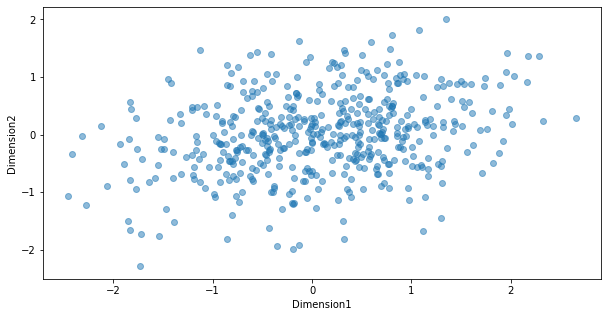

In [30]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10, 5))
ax.scatter(X[:,0], X[:,1], alpha=0.5)
plt.xlabel("Dimension1")
plt.ylabel("Dimension2")

In [31]:
cov = MinCovDet(random_state=0).fit(X)

In [9]:
cov.covariance_

array([[0.74118335, 0.25357049],
       [0.25357049, 0.30531502]])

In [33]:
cov.location_

array([0.08623481, 0.03478491])

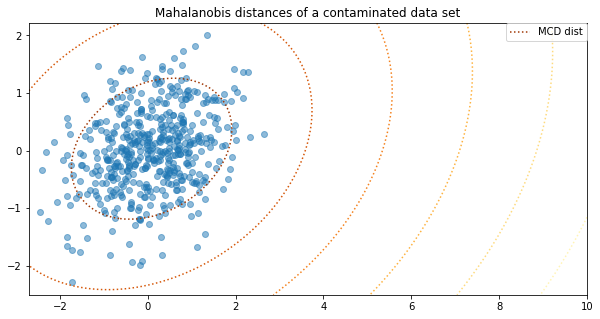

In [32]:
# Check: https://scikit-learn.org/stable/auto_examples/covariance/plot_mahalanobis_distances.html
fig, ax = plt.subplots(figsize=(10, 5))
ax.scatter(X[:,0], X[:,1], alpha=0.5)
ax.set_xlim(ax.get_xlim()[0], 10.)
ax.set_title("Mahalanobis distances of a contaminated data set")

# Create meshgrid of feature 1 and feature 2 values
xx, yy = np.meshgrid(np.linspace(plt.xlim()[0], plt.xlim()[1], 100),
                     np.linspace(plt.ylim()[0], plt.ylim()[1], 100))
zz = np.c_[xx.ravel(), yy.ravel()]

# Calculate the MCD based Mahalanobis distances
mahal_robust_cov = cov.mahalanobis(zz)
mahal_robust_cov = mahal_robust_cov.reshape(xx.shape)
robust_contour = ax.contour(xx, yy, np.sqrt(mahal_robust_cov),
                            cmap=plt.cm.YlOrBr_r, linestyles='dotted')

# Add legend
ax.legend([robust_contour.collections[1]],
          ['MCD dist'],
          loc="upper right", borderaxespad=0)

plt.show()

<a id='sect4_2'></a>
### <font color='darkgreen'>1.2. Principal Component Analysis (PCA)</font>
This statistical methodology builds up the essentials of [multivariate data analysis](https://blog.umetrics.com/data-analytics-for-beginners-how-multivariate-data-analysis-can-separate-the-players-from-the-gorillas) that uses an orthogonal transformation to apply a set of observations of probably correlated variables into a set of values of uncorrelated variables in a linear way. It serves as a multivariate table as a smaller set of variables to be able to inspect trends, bounces, and outliers. **This type of high-level analysis may expose the interconnection between observations and variables.**

As one of the statistical anomaly detection approaches, **it can be applied to, for instance, mark fraudulent transactions by evaluating applicable features to define what establishes as normal observation and assigning distance metrics to detect possible cases that serve as outliers/anomalies.** This kind of approach allows training a model using the present unbalanced dataset.
![6.png](images/6.png)
<br/>
Regarding the Python Library for Implementation, you can refer to scikit-learn on [**sklearn.decomposition.PCA**](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html) ([more](https://scikit-learn.org/stable/modules/decomposition.html#pca))

#### Algorithm
```
X = N × m    # Sample Covariance Matrixfor each data point xi
   X = subtract mean x from each column vector xi in X
   Σ = (X*X).T 
return { λi, ui }i=(1..k)* Top-k vectors are more crucial eigenvectors
```

<a id='sect5'></a>
## <font color='darkblue'>2. DENSITY-BASED APPROACHES</font>

<a id='sect5_1'></a>
### <font color='darkgreen'>2.1. Density-Based Spatial Clustering of Applications with Noise (DBSCAN)</font>
The [**Density-Based Spatial Clustering of Applications with Noise**](https://en.wikipedia.org/wiki/DBSCAN) (DBSCAN) aims to detect anomalous data points with the help of the density of its encircled space that is detached by regions of low-density observations.

**Major concepts of this methodology can be listed as <font color='darkblue'>density</font> and <font color='darkblue'>connectivity</font> which are calculated in terms of the local distribution of their nearest neighbors.** There exists two key parameters of the algorithm are:
* **distance threshold — epsilon (ɛ)**: The given radius of the neighborhoods around a data point
* **min_samples**: The minimum number of data points in a neighborhood to create a cluster

With the help of these parameters, the algorithm can be broken down in the following steps:
1. Detecting the points in the ε (eps neighborhood of every point and identify the core points with more than minimum points neighbors.
2. Find the connected components of inlier points on the neighbor graph, ignoring all non-core points.
3. Assign each non-inlier point to a nearby cluster if the cluster is an ε-distance neighbor, otherwise assign it to noise.

A naive implementation of this requires storing the neighborhoods in step 1, thus requiring substantial memory. The original DBSCAN algorithm does not require this by performing these steps for one point at a time.

Regarding the Python Library for Implementation, you can refer to scikit-learn on [**sklearn.cluster.DBSCAN**](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html)

#### Algorithm
```
DBSCAN(Data, Epsilon, MinPts)
   Cluster_Label = 0
   for each unvisited observation Point in dataset Data
      assign Point as visited
      Neighbors = getNeighbors (Point, Epsilon)
      if sizeof(Neighbors) < MinPts
         assign Point as Outlier
      else
         Cluster_Label = next cluster
         extendClusterSize(Point, Neighbors, Cluster_Label, Epsilon, MinPts)
 
extendClusterSize(Point, Neighbors, Cluster_Label, Epsilon, MinPts)
   add Point to cluster Cluster_Label
   for each point Point' in Neighbors 
      if Point' is not visited
         assign Point' as visited
         Neighbors' = getNeighbors(Point', Epsilon)
         if sizeof(Neighbors') >= MinPts
            Neighbors = Neighbors joined with Neighbors'
      if Point' is not yet member of any cluster
         add Point' to cluster Cluster_Label
```

<a id='sect5_2'></a>
### <font color='darkgreen'>2.2. Ordering Points To Identify the Clustering Structure (OPTICS)</font>
[**Ordering points to identify the clustering structure**](https://en.wikipedia.org/wiki/OPTICS_algorithm#:~:text=OPTICS%2DOF%20is%20an%20outlier,based%20on%20the%20same%20concepts.) (OPTICS) can be defined as an algorithm for outlying density-based groups in dimensional data.

**It is an approach for detecting density-based clusters in spatial data.** Its algorithm methodology is not only related to DBSCAN but also it labels one of the DBSCAN algorithm’s crucial gap in identifying differing density-based useful clusters.

There are some key points in the descriptions of the parameters of DBSCAN, and OPTICS as core point, core distance, and reachability distance:
* **Core point:** A point that resides at the center of the cluster can be accepted as a core point by providing minimally `MinPts` data points are located within its neighbors.
* **Core Distance**: The minimum length of radius required to group provided observations as a core point.
* **Reachability Distance**: This distance metric represents the shortest length that is defined with respect to the cluster’s central point to another data point that cannot be smaller than the core distance. In the below depiction, the reachability distance between `(c, a)` is assigned as x, since their distance is smaller than the core distance which is not acceptable.

![7.png](images/7.png)
<br/>
Regarding the Python Library for Implementation, you can check scikit-learn on [**sklearn.cluster.OPTICS**](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.OPTICS.html) ([more](https://scikit-learn.org/stable/modules/clustering.html#optics))

#### Algorithm
```
OPTICS(DB, Epsilon, MinPts)
    for each observation Point in dataset DB
        Point.reachabilityDistance = UNDEFINED
    for each unprocessed point Point of DB
        Neighbors = getNeighbors(Point, Epsilon)
        assign Point as visited
        output Point to the ordered list
        if coreDistance(Point, Epsilon, MinPts) != UNDEFINED then
            Queue = empty priority queue
            updateCluster(Neighbors, Point, Queue, Epsilon, MinPts)
            for each next Q in Queue
                Neighbors' = getNeighbors(Q, Epsilon)
                assign Q as visited
                output Q to the ordered list
                if coreDistance(Q, Epsilon, MinPts) != UNDEFINED do
                    updateCluster(Neighbors', Q, Queue, Epsilon, MinPts)updateCluster(N, Point, Queue, Epsilon, MinPts) is
    coreDist = coreDistance(Point, Epsilon, MinPts)
    for each Observation in N
        if Observation is not visited then
            newReachabilityDistance = max(coreDist, dist(Point, Observation))
            if Observation.reachabilityDistance == UNDEFINED then    
                Observation.reachabilityDistance = newReachabilityDistance
                Queue.insert(Observation, newReachabilityDistance)   
                if newReachabilityDistance < Observation.reachabilityDistance then
                    Observation.reachabilityDistance = newReachabilityDistance
                    Queue.moveObservation(Observation, newReachabilityDistance)
```

<a id='sect6'></a>
## <font color='darkblue'>3. DISTANCE-BASED APPROACHES</font>

<a id='sect6_1'></a>
### <font color='darkgreen'>3.1. Local Outlier Factor (LOF)</font>
The Local Outlier Factor can be described as the calculation that scans through the neighbors of a certain point to discover its density and examine this to the density of other points to measure the distance between them.

It calculates a score matching the degree of irregularity of the observations and measures the local density differentiation of a specified data point comparing to its neighbors. **The logic is to identify the samples that have a considerably minor density than their surrounded-points.**
![8.png](images/8.png)
<br/>
Inlier points are local in the local outlier factor score builds upon how detached a single data node is regarding the encircling region. More accurately, the condition of being local is assigned by k-nearest neighbors, whose gap between points is used to calculate the local density.

**By contrasting the inner density of a point to the local densities of its neighbors, one can specify samples that allocates a distinctively lower density than their neighbors can be called outliers.**
![9.png](images/9.png)
<br/>
Regarding the Python Library for Implementation, you can check scikit-learn on [**sklearn.neighbors.LocalOutlierFactor**](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.LocalOutlierFactor.html)

#### Algorithm
```
LOF = null
for each observation Point in DB
    KNNeighbors = kDistance(Distance, K)
    LocalReacbilityDistance = reachDistanceK(KNNeighbors, K)
    for each Point in KNNeighbors
        tempLOF[i] = sum((LocalReacbilityDistance[Obs ∈ N (Point)])   /  LocalReacbilityDistance[i]) / |N(Point)|
        LOF =  max(LOF, tempLOF)
return top(LOF)
```

<a id='sect6_2'></a>
### <font color='darkgreen'>3.2. Novelty Detection with Local Outlier Factor</font>
**Novelty detection can be accepted as the description of a novel** (<font color='brown'>new</font>) **or undiscovered patterns in the data**. The novelties revealed are not considered anomalous data points; instead, they are been practiced in the data model.

The complicatedness of present highly integrated systems is similar to a restricted comprehension of the connections between the different system components that can be collected. An unavoidable effect of this situation is the presence of an enormous number of potential unusual forms, some of which may not be established as rational which causes regular multi-class classification schemes improper for these operations. A possible resolution to this issue is proposed by the algorithm of novelty detection, in which a definition of being an inlier is trained by creating a model with various examples depicting positive states. Formerly undiscovered patterns are then tested by contrasting them with the model of accepted-inliers, usually proceeded in some mode of [**novelty score**](https://romisatriawahono.net/lecture/rm/survey/machine%20learning/Pimentel%20-%20Novelty%20Detection%20-%202014.pdf). **A novelty score may be generated for these formerly unseen data points with the help of a decision threshold score. The points which substantially diverge from this decision threshold may be treated as outliers.**

In other words, **novelty detection can be described as the process of acknowledging that test data deviates in some way from the training data.** Its practical influence and challenging essence have guided many suggestions for being proposed. **These approaches are mostly applied to datasets in which a huge number of cases of the inlier or positive state is available and where there are scarce data to define outlier or negative state.**
![10.png](images/10.png)
<br/>
Regarding the Python Library for Implementation, you can check scikit-learn on [**sklearn.neighbors.LocalOutlierFactor**](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.LocalOutlierFactor.html)

<a id='sect6_3'></a>
### <font color='darkgreen'>3.3. Mahalanobis Distance</font>
**For the given data source that holds standard normal distribution, the corresponding mean shall be zero while variance shall be observed as 1.**
> The [standard normal distribution](https://courses.lumenlearning.com/introstats1/chapter/the-standard-normal-distribution/) has differentiative specifications from the [normal distribution](https://en.wikipedia.org/wiki/Normal_distribution) that can be expressed by means of the [normal distribution](https://en.wikipedia.org/wiki/Normal_distribution) having two distinct parameters as `μ=0` and `σ=1` with a representation of `N(μ,σ) → N(0,1)`.

![11.png](images/11.png)
<br/>
[**Mahalanobis Distance**](https://en.wikipedia.org/wiki/Mahalanobis_distance) is one of the outlier detection approaches which provides a simple means of detecting outliers in multidimensional data where the distance is between a point and a distribution and not between two distinct points.
![12.png](images/12.png)
<br/>
Regarding the Python Library for Implementation, you can refer to scikit-learn on [**sklearn.neighbors.DistanceMetric**](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.DistanceMetric.html)

#### Algorithm
```
First Version:
    
Mahalanobis = [(Y – X)T * SampCov -1 * (Y – X)] ^ 0.5- X, Y    : Pair of observations
- SampCov : Sample covariance matrix
Alternative Version:
    
Distance_n = [((xn – x̄)^t)*(C)^(-1) * (xn – x̄)] ^ 0.5
- xn = an observation vector
- x̄ = arithmetic mean vector
```

<a id='sect7'></a>
## <font color='darkblue'>4. ISOLATION-BASED APPROACH</font>

<a id='sect7_1'></a>
### <font color='darkgreen'>4.1. Isolation Forest</font>
**[Isolation Forest](https://en.wikipedia.org/wiki/Isolation_forest) also called iForest recognizes abnormal activities as opposed to profiling typical data points**. Isolation Forest, similar to any tree ensemble methodology, is based on decision trees. Among these trees, partitions are generated by first arbitrarily choosing a component and afterward choosing a randomly selected value in the scope of min and max of in a specified feature set. **The algorithm is based on the idea that outliers represent data points that are few and different.**

There exist two variables in this algorithm. One is the number of trees to be built and the size of [**sub-sampling**](https://cs.nju.edu.cn/zhouzh/zhouzh.files/publication/icdm08b.pdf?q=isolation-forest) which enables the following subjects:
* To accomplish a low time-complexity with a reduced memory necessity
* To carry out the [**impacts of swamping**, labeling nonoutlier as an outlier, and masking, an unidentified outlier](http://m-hikari.com/ijcms-password2007/5-8-2007/chiangIJCMS5-8-2007.pdf)

With the help of these parameters, the isolation forest method does not take into consideration the distance and density metrics to catch anomalous behavior. **This approach adds an advantage to [iForest](https://en.wikipedia.org/wiki/Isolation_forest#cite_note-:0-1) over [distance-centered](https://hub.packtpub.com/4-popular-algorithms-distance-based-outlier-detection/) or [density-centered](https://ch.mathworks.com/matlabcentral/fileexchange/72244-density-based-outlier-detection-algorithms) methodologies since it excludes an extensive load of distance measurement.**

Isolation forest works very efficiently in case of having a narrow-sized data set to profile outliers.

Below, the left-hand side graph shows the formed tree after the algorithm is executed. The **blue line** represents the normal data points while the **red line** can be accepted as the tree with anomalous data points. On the second graph, a schematic example of a tree and a plotted forest is shown with **red-colored lines out abnormal data point existence while blue ones are normal ones**.
![13.png](images/13.png)
<br/>

#### Formulation
* **Step 1:** Sampling for training a model
* **Step 2:** Random selection of a value that is between minimum and maximum of chosen data points
* **Step 3:** Repeating of step 2 of binary splitting to continue create a forest
* **Step 4:** Continuous feed of data resource to calculate anomaly score for every generated tree and their corresponding average path lengths

At the end of the average path sizes, **an outlier is expected to have a shorter path length compared to an inlier.**
![14.png](images/14.png)
<br/>

Regarding the Python Library for Implementation, please check scikit-learn [**sklearn.ensemble.IsolationForest**](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.IsolationForest.html?highlight=isolation%20forest#sklearn-ensemble-isolationforest)

#### Algorithm
```
t = null (the empty tree)if numberOfRow(Leaf) == 1 then return t
   Randomly select li a feature of Leaf
   Randomly select a split observation O ∈ (min(li), max(li))
   Add to t the node N li,Point
   Assign Leaf_l and Leaf_R as the matrix 
   Repeat the looping with Leaf = Leaf_l
     Add the obtained tree as the left child of main tree t
   Repeat the looping with Leaf = Leaf_r 
     Add the obtained tree as the right child of main tree t
```

<a id='sect8'></a>
## <font color='darkblue'>5. CLASSIFICATION-BASED APPROACHES</font>

<a id='sect8_1'></a>
### <font color='darkgreen'>5.1. One-Class SVM</font>
**The [One-Class SVM](https://en.wikipedia.org/wiki/One-class_classification) can be accepted as sensitive to anomalous points which leads to poor performance outlier detection by using the training data with outliers**. This predictor is correctly matched for [novelty detection](https://www.sciencedirect.com/science/article/abs/pii/S016516841300515X) when the training set is not surrounded by outlier data points which aim to detect new observation as an outlier instead of detecting the noisy data in the existing data.

A One-Class SVM might give beneficial results in multi-dimensional situations depending on the value of its hyperparameters. The aim of this algorithm to detach data points from the origin to maximize the distance between the subspace dimension to the origin.

This situation proceeds in a result set of binary outputs which grab areas in the input space in which the probability density of the data locates. **In this way, the function returns +1 for inliers in a limited region which contains the space by occupying training observations and −1 for outliers.**:
![15.png](images/15.png)
<br/>
Regarding the Python Library for Implementation, pleaes check scikit-learn on [**sklearn.svm.OneClassSVM**](https://scikit-learn.org/stable/modules/generated/sklearn.svm.OneClassSVM.html) ([more](https://scikit-learn.org/stable/modules/outlier_detection.html#outlier-detection))

#### Algorithm
```
X = {x1, x2....xm, z}, X ∈ R^d                # Observation VectorK(φ(xi), φ(xj ))                              # Feature Mapping
ρ = sum(k=1 to Ns) k=1 α(k) K(Φ(x̄)Φ(xk̄))    # Bias calculation
f(z̄) = sum(k=1 to Ns) k=1 α(k) K(Φ(xk̄)Φ(z̄))# Score Calculation
    
if f(z̄) > ρ then 
   return 1
else
   return 0
end if
```

#### Example

In [69]:
# https://scikit-learn.org/stable/auto_examples/miscellaneous/plot_anomaly_comparison.html#sphx-glr-auto-examples-miscellaneous-plot-anomaly-comparison-py
import numpy as np
from sklearn.datasets import make_blobs

# Example settings
n_samples = 300
outliers_fraction = 0.05
n_outliers = int(outliers_fraction * n_samples)
n_inliers = n_samples - n_outliers

# Define datasets
blobs_params = dict(random_state=0, n_samples=n_inliers, n_features=2)
X, _ = make_blobs(centers=[[0, 0]], cluster_std=1, **blobs_params)
y = np.array([0] * n_inliers)
noise, _ = make_blobs(centers=[[0, 0]], cluster_std=3, n_samples=n_outliers, n_features=2)
noise = noise * 3
noise_y = np.array([1] * n_outliers)
X = np.concatenate((X, noise))
y = np.concatenate((y, noise_y))

In [70]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

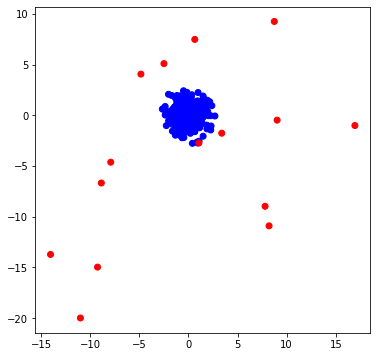

In [93]:
import matplotlib
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"]=6,6
colors = ['blue','red']
label = ['A', 'B']
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=matplotlib.colors.ListedColormap(colors))

In [87]:
from sklearn.svm import OneClassSVM

clf = OneClassSVM(gamma=0.1, kernel='rbf', nu=outliers_fraction).fit(X)
y_predict = clf.predict(X)

In [95]:
# -1 is anomaly; 1 is nomal => nomal = 0; anomaly = 1
y_predict = np.array(list(map(lambda e: 0 if e == 1 else 1, y_predict)))

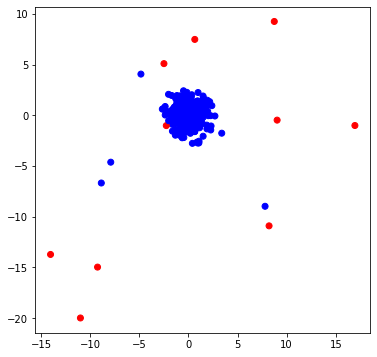

In [94]:
plt.scatter(X[:, 0], X[:, 1], c=y_predict, cmap=matplotlib.colors.ListedColormap(colors))

## <font color='darkblue'>Supplement</font>
* [Scikit-learn: Comparing anomaly detection algorithms for outlier detection on toy datasets](https://scikit-learn.org/stable/auto_examples/miscellaneous/plot_anomaly_comparison.html#sphx-glr-auto-examples-miscellaneous-plot-anomaly-comparison-py)